In [1]:
import os
import pandas as pd
import networkx as nx
import igraph as ig
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.io
from scipy.stats import pearsonr
import pickle

# show current directory
print(os.getcwd())

/users-2/amine/pcax24/examples


In [2]:
def load_graph(file_path):
    graph_data = pd.read_csv(file_path, sep='\t', header=None, comment='%', names=['from', 'to', 'weight'])
    graph_data.dropna(inplace=True)
    return graph_data

def remove_cycles_simplified(graph_data):
    G = nx.DiGraph()
    for index, row in graph_data.iterrows():
        G.add_edge(row['from'], row['to'], weight=row['weight'])
    
    removed_edges = []
    while True:
        try:
            cycle = nx.find_cycle(G)
            if not cycle:
                break
            # Remove the first edge in the cycle (simplified approach)
            edge_to_remove = cycle[0]
            G.remove_edge(*edge_to_remove)
            removed_edges.append(edge_to_remove)
        except nx.NetworkXNoCycle:
            break

    return G, removed_edges

# Path to the file
file_path = 'data/out.dimacs10-celegansneural'

# Load the graph data
graph_data = load_graph(file_path)

In [3]:
# show number of nodes in the graph
print(len(graph_data['from'].unique()))
# show number of edges in the graph
print(len(graph_data))

297
4296


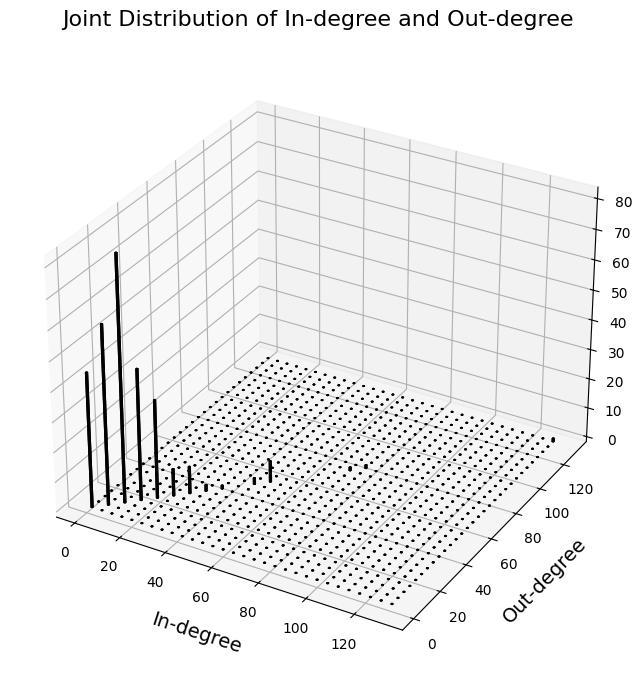

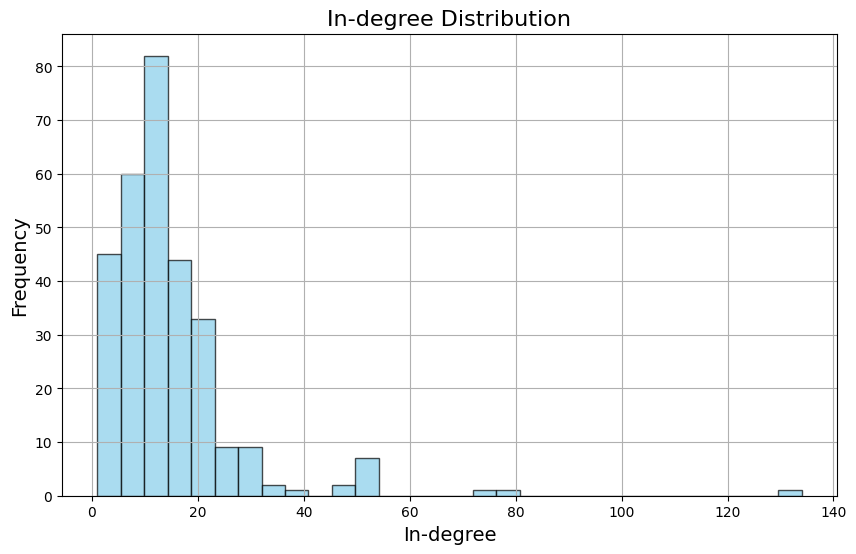

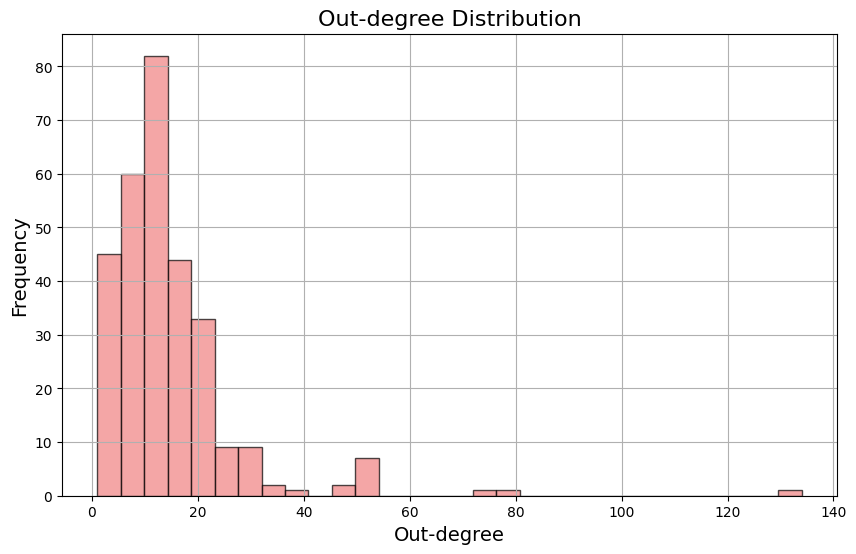

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def plot_indegree_outdegree_distribution(graph_data):
    # Create a directed graph
    G = nx.DiGraph()
    for index, row in graph_data.iterrows():
        G.add_edge(row['from'], row['to'], weight=row['weight'])

    # Calculate in-degree and out-degree for each node
    indegrees = dict(G.in_degree())
    outdegrees = dict(G.out_degree())

    # Prepare data for plotting
    indegree_values = np.array(list(indegrees.values()))
    outdegree_values = np.array(list(outdegrees.values()))

    # Plotting
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    hist, xedges, yedges = np.histogram2d(indegree_values, outdegree_values, bins=30)

    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = np.zeros_like(xpos)

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='skyblue', edgecolor='k', alpha=0.7)

    ax.set_xlabel('In-degree', fontsize=14, labelpad=10)
    ax.set_ylabel('Out-degree', fontsize=14, labelpad=10)
    ax.set_zlabel('Frequency', fontsize=14, labelpad=10)

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='z', labelsize=10)

    plt.title('Joint Distribution of In-degree and Out-degree', fontsize=16, pad=20)
    plt.show()

def plot_indegree_distribution(graph_data):
    # Create a directed graph
    G = nx.DiGraph()
    for index, row in graph_data.iterrows():
        G.add_edge(row['from'], row['to'], weight=row['weight'])

    # Calculate in-degree for each node
    indegrees = dict(G.in_degree())
    indegree_values = np.array(list(indegrees.values()))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(indegree_values, bins=30, color='skyblue', edgecolor='k', alpha=0.7)
    plt.xlabel('In-degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('In-degree Distribution', fontsize=16)
    plt.grid(True)
    plt.show()

def plot_outdegree_distribution(graph_data):
    # Create a directed graph
    G = nx.DiGraph()
    for index, row in graph_data.iterrows():
        G.add_edge(row['from'], row['to'], weight=row['weight'])

    # Calculate out-degree for each node
    outdegrees = dict(G.out_degree())
    outdegree_values = np.array(list(outdegrees.values()))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(outdegree_values, bins=30, color='lightcoral', edgecolor='k', alpha=0.7)
    plt.xlabel('Out-degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Out-degree Distribution', fontsize=16)
    plt.grid(True)
    plt.show()

plot_indegree_outdegree_distribution(graph_data)
plot_indegree_distribution(graph_data)
plot_outdegree_distribution(graph_data)

In [5]:
# please show the unique weight values in the graph
print(graph_data['weight'].unique())
graph_data.head()

[ 1  2  6  4  3  9 11  5 16  7 48 25 72 37 18 12 14 10 27  8 17 19 20 13
 36 15 29 24 22 31 23 30 28 61 63]


,from,to,weight
0,1,2,1
1,1,3,2
2,1,4,1
3,1,5,2
4,1,6,1


In [6]:
# Create a directed networkx graph from the graph data using nx.from_pandas_edgelist
G_pandas = nx.from_pandas_edgelist(graph_data, 'from', 'to', edge_attr='weight', create_using=nx.DiGraph)

In [7]:
# Let's convert the pandas DataFrame into a NetworkX Directed Graph (DiGraph)

def convert_to_digraph(graph_data):
    G = nx.DiGraph()
    for index, row in graph_data.iterrows():
        G.add_edge(row['from'], row['to'], weight=row['weight'])
    return G

# Convert the pandas DataFrame to a NetworkX DiGraph
G = convert_to_digraph(graph_data)

# Display basic information about the graph
print(G)


DiGraph with 297 nodes and 4296 edges


In [23]:
# more information about the data:
# 1. https://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1001066&type=printable
# 2. https://github.com/jni/elegant-scipy/blob/f4caf80d915dc459d60e66edc12e351d6386ccbf/script/convert-connectivity-data.py#L19

# Load the .mat file
file_path = 'data/ConnOrdered_040903.mat'
mat = scipy.io.loadmat(file_path)

# Load the keys 'A_init_t_ordered', 'Ag_t_ordered'

### NOTE: A_init_t_ordered represents adjacency matrix for chemical synapse (neurotransmitter) network (CSN)  which is a directed network with asymmetric adjacency matrix.
A_init_t_ordered = np.array(mat['A_init_t_ordered'].todense())
print('A_init_t_ordered shape:', A_init_t_ordered.shape)

### NOTE: Ag_t_ordered represents adjacency matrix for gap junction (electrical coupling) network (GJN) which is an undirected network with symmetric adjacency matrix. 
Ag_t_ordered = np.array(mat['Ag_t_ordered'].todense()) 
print('Ag_t_ordered shape:', Ag_t_ordered.shape)

# Create NetworkX DiGraphs from the adjacency matrices
G_A_init_t_ordered = nx.DiGraph(A_init_t_ordered)
G_Ag_t_ordered = nx.DiGraph(Ag_t_ordered)

# Function to print basic graph info
def print_graph_info(G, name):
    print(f"{name} has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    print(f"Graph density of {name}: {nx.density(G)}")
    print(f"Graph {name} is directed: {G.is_directed()}")


A_init_t_ordered shape: (279, 279)
Ag_t_ordered shape: (279, 279)


In [9]:
# Print information about all the graphs G, G_pandas, G_A_init_t_ordered, and G_Ag_t_ordered and print a new line after each graph info
print_graph_info(G, 'G')
print()
print_graph_info(G_pandas, 'G_pandas')
print()
print_graph_info(G_A_init_t_ordered, 'G_A_init_t_ordered')
print()
print_graph_info(G_Ag_t_ordered, 'G_Ag_t_ordered')
print()

G has 297 nodes and 4296 edges.
Graph density of G: 0.048867048867048866
Graph G is directed: True

G_pandas has 297 nodes and 4296 edges.
Graph density of G_pandas: 0.048867048867048866
Graph G_pandas is directed: True

G_A_init_t_ordered has 279 nodes and 2194 edges.
Graph density of G_A_init_t_ordered: 0.028287047781129934
Graph G_A_init_t_ordered is directed: True

G_Ag_t_ordered has 279 nodes and 1031 edges.
Graph density of G_Ag_t_ordered: 0.01329259173306516
Graph G_Ag_t_ordered is directed: True



In [10]:
# Compare with the previously loaded connectome data
def compare_graphs(G1, G2):
    print(f"Graph 1 has {G1.number_of_nodes()} nodes and {G1.number_of_edges()} edges.")
    print(f"Graph 2 has {G2.number_of_nodes()} nodes and {G2.number_of_edges()} edges.")
    common_edges = len(set(G1.edges()).intersection(set(G2.edges())))
    print(f"Number of common edges: {common_edges}")

def are_digraphs_equivalent(G1, G2):
    # Check if both graphs have the same set of nodes
    if set(G1.nodes) != set(G2.nodes):
        return False
    
    # Check if both graphs have the same set of edges
    if set(G1.edges) != set(G2.edges):
        return False
    
    # Check if all corresponding edges have the same weights
    for (u, v) in G1.edges:
        if G1[u][v]['weight'] != G2[u][v]['weight']:
            return False
    
    return True

# Example usage
# Assuming G_A_init_t_ordered and G_Ag_t_ordered are your graphs
G1 = G_A_init_t_ordered  # Replace with your first graph
G2 = G_Ag_t_ordered      # Replace with your second graph

equivalent = are_digraphs_equivalent(G1, G2)
print("The graphs G_A_init_t_ordered and G_Ag_t_ordered are equivalent:", equivalent)
print()

# Assuming G is the previously loaded connectome data graph
compare_graphs(G, G_pandas)
equivalent = are_digraphs_equivalent(G, G_pandas)
print("The graphs G and G_pandas are equivalent:", equivalent)

The graphs G_A_init_t_ordered and G_Ag_t_ordered are equivalent: False

Graph 1 has 297 nodes and 4296 edges.
Graph 2 has 297 nodes and 4296 edges.
Number of common edges: 4296
The graphs G and G_pandas are equivalent: True


In [11]:
# Check if the graphs are DAGs
def check_if_dag(G, name):
    is_dag = nx.is_directed_acyclic_graph(G)
    print(f"{name} is a DAG: {is_dag}")

# Checking all four graphs
check_if_dag(G, "G")
check_if_dag(G_pandas, "G_pandas")
check_if_dag(G_A_init_t_ordered, "G_A_init_t_ordered (G1)")
check_if_dag(G_Ag_t_ordered, "G_Ag_t_ordered (G2)")

G is a DAG: False
G_pandas is a DAG: False
G_A_init_t_ordered (G1) is a DAG: False
G_Ag_t_ordered (G2) is a DAG: False


In [12]:
# Function to remove cycles using a DFS-based approach
def remove_cycles_dfs(G):
    def dfs(v, visited, stack, removed_edges):
        visited[v] = True
        stack[v] = True
        
        for neighbor in list(G[v]):
            if not visited[neighbor]:
                if dfs(neighbor, visited, stack, removed_edges):
                    return True
            elif stack[neighbor]:
                # Found a back edge
                G.remove_edge(v, neighbor)
                removed_edges.append((v, neighbor))
        
        stack[v] = False
        return False

    visited = {node: False for node in G}
    stack = {node: False for node in G}
    removed_edges = []

    for node in G:
        if not visited[node]:
            dfs(node, visited, stack, removed_edges)
    
    return G, removed_edges

# Create a copy of the graph to preserve the original
G_no_cycles = G.copy()
G_no_cycles, removed_edges = remove_cycles_dfs(G_no_cycles)

# Check if the modified graph has no cycles
has_cycle = nx.is_directed_acyclic_graph(G_no_cycles)

# Print the number of removed edges and whether the graph has cycles
print(f"Number of removed edges: {len(removed_edges)}")
print(f"Graph has cycles: {not has_cycle}")

# Verify if the modified graph is acyclic
is_acyclic = nx.is_directed_acyclic_graph(G_no_cycles)
# Print the result
print(f"The modified graph is acyclic: {is_acyclic}")

Number of removed edges: 2148
Graph has cycles: False
The modified graph is acyclic: True


In [13]:
# Function to convert NetworkX DiGraph to igraph Graph
def nx_to_igraph(G):
    # see: https://networkx.org/documentation/stable/auto_examples/external/plot_igraph.html
    ig_graph = ig.Graph.from_networkx(G)
    return ig_graph

# Function to convert igraph Graph to NetworkX DiGraph
def igraph_to_nx(ig_graph):
    G = nx.DiGraph()
    names = ig_graph.vs['_nx_name']
    G.add_nodes_from(names)
    G.add_edges_from([(names[e.source], names[e.target]) for e in ig_graph.es])
    for e in ig_graph.es:
        G[names[e.source]][names[e.target]]['weight'] = e['weight']
    return G

# Function to convert a graph to a DAG by removing the minimum feedback arc set using igraph
def convert_to_dag_igraph(G):
    ig_graph = nx_to_igraph(G)
    # see: https://igraph.org/python/doc/api/igraph._igraph.GraphBase.html#feedback_arc_set
    feedback_arcs = ig_graph.feedback_arc_set(weights='weight')
    # see: https://python.igraph.org/en/stable/tutorial.html#adding-deleting-vertices-and-edges
    ig_graph.delete_edges(feedback_arcs)
    return igraph_to_nx(ig_graph), feedback_arcs

# Convert all four graphs to DAGs
G_dag, removed_edges_G = convert_to_dag_igraph(G.copy())
G_pandas_dag, removed_edges_G_pandas = convert_to_dag_igraph(G_pandas.copy())
G_A_init_t_ordered_dag, removed_edges_G1 = convert_to_dag_igraph(G_A_init_t_ordered.copy())
G_Ag_t_ordered_dag, removed_edges_G2 = convert_to_dag_igraph(G_Ag_t_ordered.copy())

# Print the number of removed edges for each graph
print(f"Number of edges removed from G: {len(removed_edges_G)}")
print(f"Number of edges removed from G_pandas: {len(removed_edges_G_pandas)}")
print(f"Number of edges removed from G_A_init_t_ordered (G1): {len(removed_edges_G1)}")
print(f"Number of edges removed from G_Ag_t_ordered (G2): {len(removed_edges_G2)}")

# Check if the resulting graphs are DAGs
def check_if_dag(G, name):
    is_dag = nx.is_directed_acyclic_graph(G)
    print(f"{name} is a DAG: {is_dag}")

print()
check_if_dag(G_dag, "G_dag")
print()
check_if_dag(G_pandas_dag, "G_pandas_dag")
print()
check_if_dag(G_no_cycles, "G_no_cycles")
print()
check_if_dag(G_A_init_t_ordered_dag, "G_A_init_t_ordered_dag (G1)")
print()
check_if_dag(G_Ag_t_ordered_dag, "G_Ag_t_ordered_dag (G2)")

Number of edges removed from G: 2148
Number of edges removed from G_pandas: 2148
Number of edges removed from G_A_init_t_ordered (G1): 592
Number of edges removed from G_Ag_t_ordered (G2): 517

G_dag is a DAG: True

G_pandas_dag is a DAG: True

G_no_cycles is a DAG: True

G_A_init_t_ordered_dag (G1) is a DAG: True

G_Ag_t_ordered_dag (G2) is a DAG: True


In [14]:
# now compare if G_dag and G_no_cycles are equivalent using the previously defined function
equivalent = are_digraphs_equivalent(G_dag, G_no_cycles)
print("The graphs G_dag and G_no_cycles are equivalent:", equivalent)

The graphs G_dag and G_no_cycles are equivalent: False


In [15]:
# now compare if G_pandas and G_no_cycles are equivalent using the previously defined function
equivalent = are_digraphs_equivalent(G_pandas, G_no_cycles)
print("The graphs G_pandas and G_no_cycles are equivalent:", equivalent)

The graphs G_pandas and G_no_cycles are equivalent: False


In [16]:
print()
print_graph_info(G_dag, "G_dag")
print()
print_graph_info(G_pandas_dag, "G_pandas_dag")
print()
print_graph_info(G_no_cycles, "G_no_cycles")
print()
print_graph_info(G_A_init_t_ordered_dag, "G_A_init_t_ordered_dag (G1)")
print()
print_graph_info(G_Ag_t_ordered_dag, "G_Ag_t_ordered_dag (G2)")

# now compare graphs G_dag G_pandas_dag, G_no_cycles using the previously defined function
print("Comparing G_dag and G_pandas_dag:")
compare_graphs(G_dag, G_pandas_dag)
print()
print("Comparing G_dag and G_no_cycles:")
compare_graphs(G_dag, G_no_cycles)
print()
print("Comparing G_pandas_dag and G_no_cycles:")
compare_graphs(G_pandas_dag, G_no_cycles)
print()


G_dag has 297 nodes and 2148 edges.
Graph density of G_dag: 0.024433524433524433
Graph G_dag is directed: True

G_pandas_dag has 297 nodes and 2148 edges.
Graph density of G_pandas_dag: 0.024433524433524433
Graph G_pandas_dag is directed: True

G_no_cycles has 297 nodes and 2148 edges.
Graph density of G_no_cycles: 0.024433524433524433
Graph G_no_cycles is directed: True

G_A_init_t_ordered_dag (G1) has 279 nodes and 1602 edges.
Graph density of G_A_init_t_ordered_dag (G1): 0.020654444186586216
Graph G_A_init_t_ordered_dag (G1) is directed: True

G_Ag_t_ordered_dag (G2) has 279 nodes and 514 edges.
Graph density of G_Ag_t_ordered_dag (G2): 0.0066269564993166755
Graph G_Ag_t_ordered_dag (G2) is directed: True
Comparing G_dag and G_pandas_dag:
Graph 1 has 297 nodes and 2148 edges.
Graph 2 has 297 nodes and 2148 edges.
Number of common edges: 2148

Comparing G_dag and G_no_cycles:
Graph 1 has 297 nodes and 2148 edges.
Graph 2 has 297 nodes and 2148 edges.
Number of common edges: 1496

Co

In [17]:
outdegree_counts = graph_data['from'].value_counts().to_dict()
indegree_counts = graph_data['to'].value_counts().to_dict()

# compare if they are equivalent
print(outdegree_counts == indegree_counts)

True


In [18]:
def is_symmetric(G):
    for u, v in G.edges():
        if not G.has_edge(v, u):
            return False
    return True

# Assuming G and G_pandas are already created as NetworkX DiGraphs
G_symmetric = is_symmetric(G)
G_pandas_symmetric = is_symmetric(G_pandas)

print(f"G is symmetric: {G_symmetric}")
print(f"G_pandas is symmetric: {G_pandas_symmetric}")

# now do the same for G_A_init_t_ordered and G_Ag_t_ordered
G_A_init_t_ordered_symmetric = is_symmetric(G_A_init_t_ordered)
G_Ag_t_ordered_symmetric = is_symmetric(G_Ag_t_ordered)

print(f"G_A_init_t_ordered is symmetric: {G_A_init_t_ordered_symmetric}")
print(f"G_Ag_t_ordered is symmetric: {G_Ag_t_ordered_symmetric}")

G is symmetric: True
G_pandas is symmetric: True
G_A_init_t_ordered is symmetric: False
G_Ag_t_ordered is symmetric: True


In-degree and out-degree arrays are different.


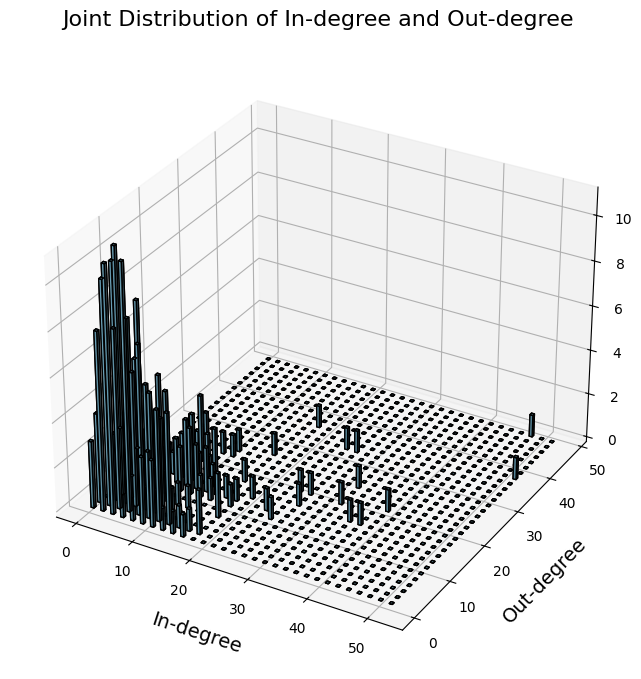

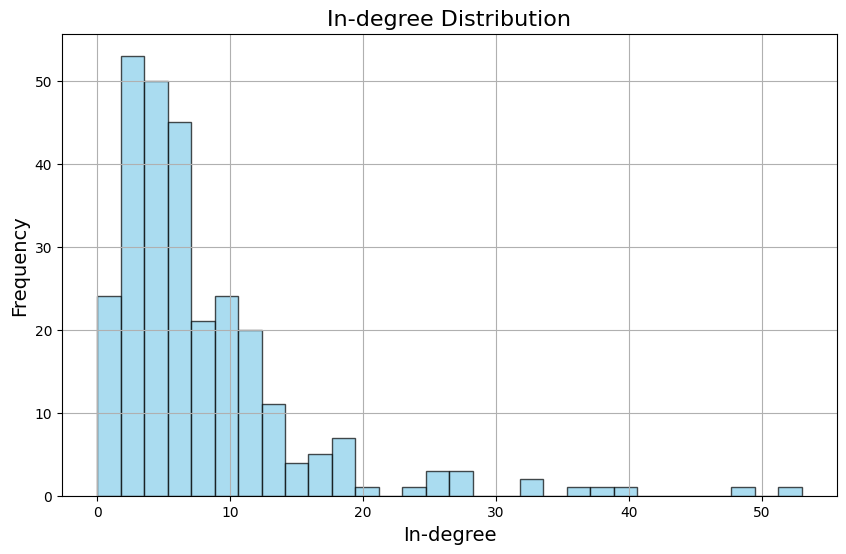

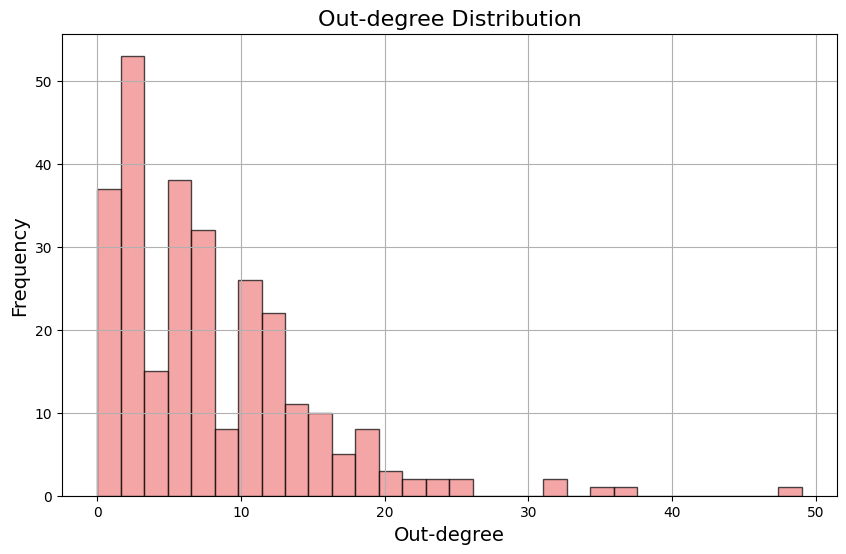

In [19]:
def compute_degrees_nx(G):
    # Compute in-degrees and out-degrees using NetworkX
    indegrees = dict(G.in_degree())
    outdegrees = dict(G.out_degree())
    return indegrees, outdegrees

def plot_indegree_outdegree_distribution_nx(G):
    # Compute in-degrees and out-degrees
    indegrees, outdegrees = compute_degrees_nx(G)

    # Prepare data for plotting
    indegree_values = np.array(list(indegrees.values()))
    outdegree_values = np.array(list(outdegrees.values()))

    # Check if in-degree and out-degree arrays are the same
    if np.array_equal(indegree_values, outdegree_values):
        print("Warning: In-degree and out-degree arrays are identical.")
    else:
        print("In-degree and out-degree arrays are different.")

    # Plotting
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    hist, xedges, yedges = np.histogram2d(indegree_values, outdegree_values, bins=30)

    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = np.zeros_like(xpos)

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='skyblue', edgecolor='k', alpha=0.7)

    ax.set_xlabel('In-degree', fontsize=14, labelpad=10)
    ax.set_ylabel('Out-degree', fontsize=14, labelpad=10)
    ax.set_zlabel('Frequency', fontsize=14, labelpad=10)

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='z', labelsize=10)

    plt.title('Joint Distribution of In-degree and Out-degree', fontsize=16, pad=20)
    plt.show()

def plot_indegree_distribution_nx(G):
    # Compute in-degrees
    indegrees, _ = compute_degrees_nx(G)
    indegree_values = np.array(list(indegrees.values()))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(indegree_values, bins=30, color='skyblue', edgecolor='k', alpha=0.7)
    plt.xlabel('In-degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('In-degree Distribution', fontsize=16)
    plt.grid(True)
    plt.show()

def plot_outdegree_distribution_nx(G):
    # Compute out-degrees
    _, outdegrees = compute_degrees_nx(G)
    outdegree_values = np.array(list(outdegrees.values()))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(outdegree_values, bins=30, color='lightcoral', edgecolor='k', alpha=0.7)
    plt.xlabel('Out-degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Out-degree Distribution', fontsize=16)
    plt.grid(True)
    plt.show()

# Example usage
plot_indegree_outdegree_distribution_nx(G_A_init_t_ordered)
plot_indegree_distribution_nx(G_A_init_t_ordered)
plot_outdegree_distribution_nx(G_A_init_t_ordered)

In [20]:
def compute_pearson_correlation(G):
    # Compute in-degrees and out-degrees
    indegrees, outdegrees = compute_degrees_nx(G)

    # Prepare data for correlation calculation
    indegree_values = np.array(list(indegrees.values()))
    outdegree_values = np.array(list(outdegrees.values()))

    # Compute Pearson correlation coefficient
    correlation, p_value = pearsonr(indegree_values, outdegree_values)
    return correlation, p_value

# Compute and print Pearson correlation coefficient
correlation, p_value = compute_pearson_correlation(G_A_init_t_ordered)
print(f"Pearson correlation coefficient regular connectome: {correlation}")
print(f"P-value regular connectome: {p_value}")

Pearson correlation coefficient regular connectome: 0.5197539275378571
P-value regular connectome: 1.044093075963585e-20


In-degree and out-degree arrays are different.


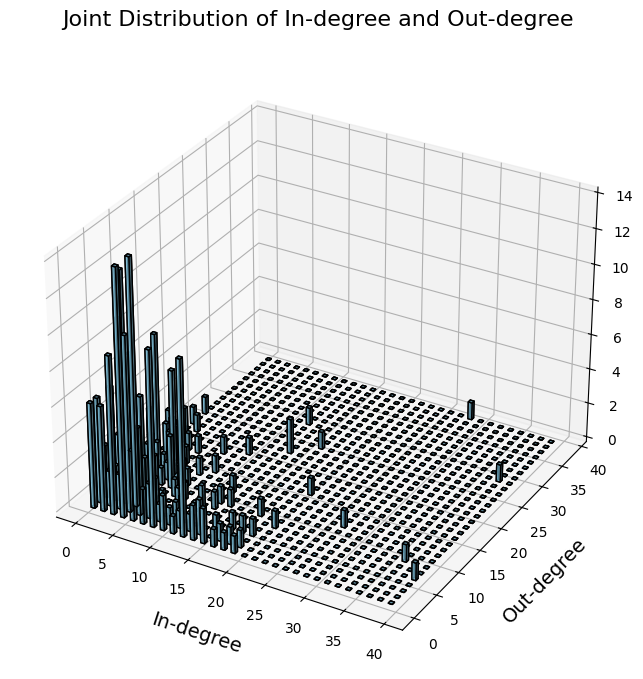

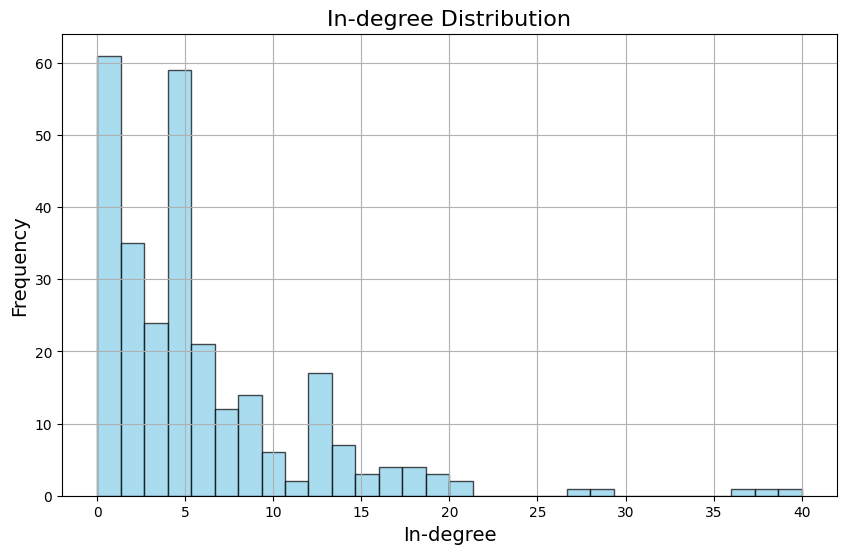

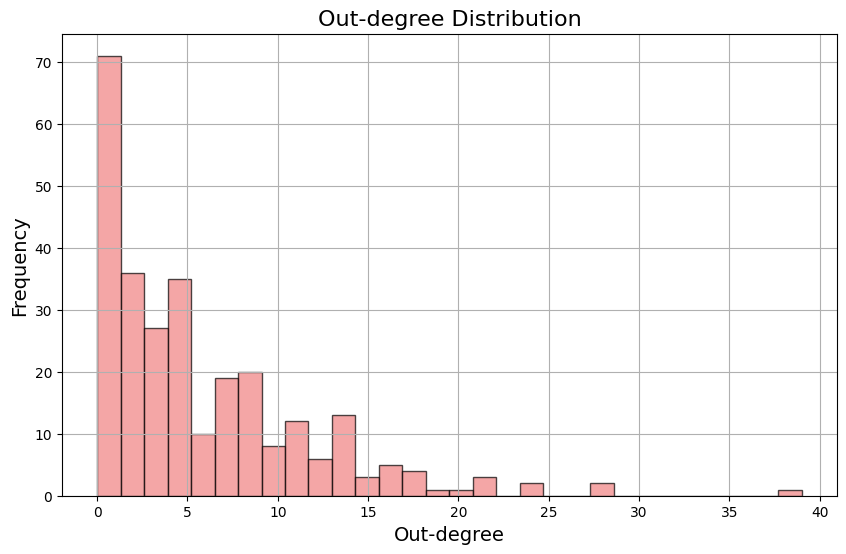

Pearson correlation coefficient for DAG connectome: 0.053678914165909794
P-value for DAG connectome: 0.37173218568282235


In [21]:
# now do the same and plot the in and out degree dist for G_A_init_t_ordered_dag
plot_indegree_outdegree_distribution_nx(G_A_init_t_ordered_dag)
plot_indegree_distribution_nx(G_A_init_t_ordered_dag)
plot_outdegree_distribution_nx(G_A_init_t_ordered_dag)

# then compute the pearson correlation coefficient
correlation, p_value = compute_pearson_correlation(G_A_init_t_ordered_dag)
print(f"Pearson correlation coefficient for DAG connectome: {correlation}")
print(f"P-value for DAG connectome: {p_value}")

In [22]:
import networkx as nx

def create_erdos_renyi_graph_with_weights(G):
    # Get the number of nodes and edges in the original graph
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    
    # Calculate the probability for edge creation in the Erdos-Renyi model
    p = num_edges / (num_nodes * (num_nodes - 1))
    
    # Create a directed Erdos-Renyi graph
    ER = nx.erdos_renyi_graph(num_nodes, p, directed=True)
    
    # Add weight attribute to all edges
    for u, v in ER.edges():
        ER[u][v]['weight'] = 1
    
    return ER

def create_erdos_renyi_graph(G):
    # Get the number of nodes and edges in the original graph
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    
    # Calculate the probability for edge creation in the Erdos-Renyi model
    p = num_edges / (num_nodes * (num_nodes - 1))
    
    # Create a directed Erdos-Renyi graph
    ER = nx.erdos_renyi_graph(num_nodes, p, directed=True)
    
    return ER

# Assuming G_A_init_t_ordered_dag is already created as a NetworkX DiGraph
ER = create_erdos_renyi_graph_with_weights(G_A_init_t_ordered)

# Display basic information about the generated Erdos-Renyi graph using the print_graph_info function
print_graph_info(ER, "ER")
print()
# given the above methods/functions check if ER is a DAG
check_if_dag(ER, "ER")

ER has 279 nodes and 2175 edges.
Graph density of ER: 0.028042082463061807
Graph ER is directed: True

ER is a DAG: False


In [ ]:
# convert the ER graph to a DAG and call it ER_dag
ER_dag, removed_edges_ER = convert_to_dag_igraph(ER.copy())

# Print the number of removed edges for the ER graph
print(f"Number of edges removed from ER: {len(removed_edges_ER)}")

# now use check_if_dag to check if ER_dag is a DAG and use the print_graph_info function to display basic info about ER_dag
check_if_dag(ER_dag, "ER_dag")
print()
print_graph_info(ER_dag, "ER_dag")

#p_ER_dag≈0.040226

In [ ]:
# now as above plot the in and out degree dist for ER along with the pearson correlation coefficient and p-value
# then do the same for ER_dag
plot_indegree_outdegree_distribution_nx(ER)
plot_indegree_distribution_nx(ER)
plot_outdegree_distribution_nx(ER)

correlation, p_value = compute_pearson_correlation(ER)
print(f"Pearson correlation coefficient for ER: {correlation}")
print(f"P-value for ER: {p_value}")

In [ ]:
# now do the same for ER_dag
plot_indegree_outdegree_distribution_nx(ER_dag)
plot_indegree_distribution_nx(ER_dag)
plot_outdegree_distribution_nx(ER_dag)

correlation, p_value = compute_pearson_correlation(ER_dag)
print(f"Pearson correlation coefficient for ER_dag: {correlation}")
print(f"P-value for ER_dag: {p_value}")

In [ ]:
# store/save networkx graphs: G_A_init_t_ordered, G_A_init_t_ordered_dag, ER, ER_dag in the data folder
# Define a function to save a NetworkX graph to a file using pickle
def save_graph(graph, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(graph, f, pickle.HIGHEST_PROTOCOL)
    print(f"Graph saved to {file_name}")

# Specify the folder where the graphs will be saved
folder = './data/'

# Save the graphs to the specified folder
save_graph(G_A_init_t_ordered, os.path.join(folder, 'G_A_init_t_ordered.gpickle'))
save_graph(G_A_init_t_ordered_dag, os.path.join(folder, 'G_A_init_t_ordered_dag.gpickle'))
save_graph(ER, os.path.join(folder, 'ER.gpickle'))
save_graph(ER_dag, os.path.join(folder, 'ER_dag.gpickle'))

# Define a function to load a NetworkX graph from a file using pickle
def load_graph(file_name):
    with open(file_name, 'rb') as f:
        graph = pickle.load(f)
    print(f"Graph loaded from {file_name}")
    return graph

# Example usage to load the saved graphs
folder = './data/'

# example usage
#G_A_init_t_ordered_loaded = load_graph(os.path.join(folder, 'G_A_init_t_ordered.gpickle'))
#G_A_init_t_ordered_dag_loaded = load_graph(os.path.join(folder, 'G_A_init_t_ordered_dag.gpickle'))
#ER_loaded = load_graph(os.path.join(folder, 'ER.gpickle'))
#ER_dag_loaded = load_graph(os.path.join(folder, 'ER_dag.gpickle'))

In [ ]:
def save_adjacency_matrix(graph, file_name):
    # Convert the NetworkX graph to an adjacency matrix
    adj_matrix = nx.to_numpy_array(graph, weight='weight')
    # Save the adjacency matrix as a .npy file
    np.save(file_name, adj_matrix)
    print(f"Adjacency matrix saved to {file_name}.npy")

# Assuming the graphs G_A_init_t_ordered, G_A_init_t_ordered_dag, ER, and ER_dag are already created

# Specify the folder where the adjacency matrices will be saved
folder = './data/'

# Save the adjacency matrices to the specified folder
save_adjacency_matrix(G_A_init_t_ordered, os.path.join(folder, 'G_A_init_t_ordered_adj_matrix'))
save_adjacency_matrix(G_A_init_t_ordered_dag, os.path.join(folder, 'G_A_init_t_ordered_dag_adj_matrix'))
save_adjacency_matrix(ER, os.path.join(folder, 'ER_adj_matrix'))
save_adjacency_matrix(ER_dag, os.path.join(folder, 'ER_dag_adj_matrix'))

In [ ]:
# Function to load the adjacency matrix
def load_adjacency_matrix(file_name):
    adj_matrix = np.load(file_name)
    print(f"Adjacency matrix loaded from {file_name}")
    return adj_matrix

# Specify the folder where the adjacency matrices were saved
folder = './data/'

# Example usage to load the saved adjacency matrices
G_A_init_t_ordered_adj_matrix = load_adjacency_matrix(os.path.join(folder, 'G_A_init_t_ordered_adj_matrix.npy'))
G_A_init_t_ordered_dag_adj_matrix = load_adjacency_matrix(os.path.join(folder, 'G_A_init_t_ordered_dag_adj_matrix.npy'))
ER_adj_matrix = load_adjacency_matrix(os.path.join(folder, 'ER_adj_matrix.npy'))
ER_dag_adj_matrix = load_adjacency_matrix(os.path.join(folder, 'ER_dag_adj_matrix.npy'))

In [ ]:
# print the name and show the shape of each adjacency matrix
print('G_A_init_t_ordered_adj_matrix:', G_A_init_t_ordered_adj_matrix.shape)
print('G_A_init_t_ordered_dag_adj_matrix:', G_A_init_t_ordered_dag_adj_matrix.shape)
print('ER_adj_matrix:', ER_adj_matrix.shape)
print('ER_dag_adj_matrix:', ER_dag_adj_matrix.shape)

In [ ]:
# show unique values in ER_dag_adj_matrix and G_A_init_t_ordered_dag_adj_matrix
print("Unique values in ER_dag_adj_matrix:", np.unique(ER_dag_adj_matrix))
print()
print("Unique values in G_A_init_t_ordered_dag_adj_matrix:", np.unique(G_A_init_t_ordered_dag_adj_matrix))
print()
# now ER_adj_matrix and G_A_init_t_ordered_adj_matrix
print("Unique values in ER_adj_matrix:", np.unique(ER_adj_matrix))
print()
print("Unique values in G_A_init_t_ordered_adj_matrix:", np.unique(G_A_init_t_ordered_adj_matrix))


In [ ]:
# Convert to binary adjacency matrices
G_A_init_t_ordered_adj_matrix_binary = (G_A_init_t_ordered_adj_matrix > 0).astype(float)
G_A_init_t_ordered_dag_adj_matrix_binary = (G_A_init_t_ordered_dag_adj_matrix > 0).astype(float)

# Specify the folder where the adjacency matrices were saved
folder = './data/'

# Save the binary adjacency matrices
np.save(os.path.join(folder, 'G_A_init_t_ordered_adj_matrix_binary.npy'), G_A_init_t_ordered_adj_matrix_binary)
np.save(os.path.join(folder, 'G_A_init_t_ordered_dag_adj_matrix_binary.npy'), G_A_init_t_ordered_dag_adj_matrix_binary)

# Print the unique values to verify
print("Unique values in G_A_init_t_ordered_adj_matrix_binary:", np.unique(G_A_init_t_ordered_adj_matrix_binary))
print("Unique values in G_A_init_t_ordered_dag_adj_matrix_binary:", np.unique(G_A_init_t_ordered_dag_adj_matrix_binary))

In [ ]:
# check if G_A_init_t_ordered_adj_matrix_binary has nonzero elements on the diagonal
print("Nonzero elements on the diagonal of G_A_init_t_ordered_adj_matrix_binary:", np.count_nonzero(np.diag(G_A_init_t_ordered_adj_matrix_binary)))
# now do the same for ER_adj_matrix
print("Nonzero elements on the diagonal of ER_adj_matrix:", np.count_nonzero(np.diag(ER_adj_matrix)))
# now for the equivalent DAGs
print("Nonzero elements on the diagonal of G_A_init_t_ordered_dag_adj_matrix_binary:", np.count_nonzero(np.diag(G_A_init_t_ordered_dag_adj_matrix_binary)))
print("Nonzero elements on the diagonal of ER_dag_adj_matrix:", np.count_nonzero(np.diag(ER_dag_adj_matrix)))
print()

# now study how many elements are nonzero above the diagonal, in effect how many edges are in the upper traingular part of the adjacency matrix
print("Number of nonzero elements above the diagonal in G_A_init_t_ordered_adj_matrix_binary:", np.count_nonzero(np.triu(G_A_init_t_ordered_adj_matrix_binary, k=1)))
print("Number of nonzero elements above the diagonal in ER_adj_matrix:", np.count_nonzero(np.triu(ER_adj_matrix, k=1)))
# now do the same for the equivalent DAGs
print("Number of nonzero elements above the diagonal in G_A_init_t_ordered_dag_adj_matrix_binary:", np.count_nonzero(np.triu(G_A_init_t_ordered_dag_adj_matrix_binary, k=1)))
print("Number of nonzero elements above the diagonal in ER_dag_adj_matrix:", np.count_nonzero(np.triu(ER_dag_adj_matrix, k=1)))
print()

# now compute the the difference between the number of nonzero elements above the diagonal for the adjacency matrix and its corresponding DAG
print("Difference between the number of nonzero elements above the diagonal for G_A_init_t_ordered_adj_matrix_binary and G_A_init_t_ordered_dag_adj_matrix_binary:", np.count_nonzero(np.triu(G_A_init_t_ordered_adj_matrix_binary, k=1)) - np.count_nonzero(np.triu(G_A_init_t_ordered_dag_adj_matrix_binary, k=1)))
print("Difference between the number of nonzero elements above the diagonal for ER_adj_matrix and ER_dag_adj_matrix:", np.count_nonzero(np.triu(ER_adj_matrix, k=1)) - np.count_nonzero(np.triu(ER_dag_adj_matrix, k=1)))
# now do the same for the lower triangular part
print("Number of nonzero elements below the diagonal in G_A_init_t_ordered_adj_matrix_binary:", np.count_nonzero(np.tril(G_A_init_t_ordered_adj_matrix_binary, k=-1)))
print("Number of nonzero elements below the diagonal in ER_adj_matrix:", np.count_nonzero(np.tril(ER_adj_matrix, k=-1)))
# now do the same for the equivalent DAGs
print("Number of nonzero elements below the diagonal in G_A_init_t_ordered_dag_adj_matrix_binary:", np.count_nonzero(np.tril(G_A_init_t_ordered_dag_adj_matrix_binary, k=-1)))
print("Number of nonzero elements below the diagonal in ER_dag_adj_matrix:", np.count_nonzero(np.tril(ER_dag_adj_matrix, k=-1)))
print()

# now compute the the difference between the number of nonzero elements below the diagonal for the adjacency matrix and its corresponding DAG
print("Difference between the number of nonzero elements below the diagonal for G_A_init_t_ordered_adj_matrix_binary and G_A_init_t_ordered_dag_adj_matrix_binary:", np.count_nonzero(np.tril(G_A_init_t_ordered_adj_matrix_binary, k=-1)) - np.count_nonzero(np.tril(G_A_init_t_ordered_dag_adj_matrix_binary, k=-1)))
print("Difference between the number of nonzero elements below the diagonal for ER_adj_matrix and ER_dag_adj_matrix:", np.count_nonzero(np.tril(ER_adj_matrix, k=-1)) - np.count_nonzero(np.tril(ER_dag_adj_matrix, k=-1)))

# now compute the difference between the number of nonzero elements between the adjacency matrix and its corresponding DAG
print("Difference between the number of nonzero elements for G_A_init_t_ordered_adj_matrix_binary and G_A_init_t_ordered_dag_adj_matrix_binary (which is just the sum of the differences above and below the diagonal):", np.count_nonzero(G_A_init_t_ordered_adj_matrix_binary) - np.count_nonzero(G_A_init_t_ordered_dag_adj_matrix_binary))
print("Difference between the number of nonzero elements for ER_adj_matrix and ER_dag_adj_matrix (which is just the sum of the differences above and below the diagonal):", np.count_nonzero(ER_adj_matrix) - np.count_nonzero(ER_dag_adj_matrix))
      


In [ ]:
def permute_to_upper_triangular(adj_matrix):
    # Convert the adjacency matrix to a NetworkX graph
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
    
    # Check if the graph is a DAG
    if not nx.is_directed_acyclic_graph(G):
        print("The graph is not a DAG and cannot be permuted to a triangular matrix.")
        return None
    
    # Perform topological sort
    topo_sort = list(nx.topological_sort(G))
    
    # Permute the adjacency matrix according to the topological sort
    permuted_matrix = adj_matrix[np.ix_(topo_sort, topo_sort)]

    print("The adjacency matrix has been permuted to an upper triangular matrix.")
    
    return permuted_matrix

# Check and permute matrices
print("Permuting the adjacency matrix of G_A_init_t_ordered to an upper triangular matrix...")
G_A_init_t_ordered_upper_triangular_binary = permute_to_upper_triangular(G_A_init_t_ordered_adj_matrix_binary)
print()
print("Permuting the adjacency matrix of ER to an upper triangular matrix...")
ER_upper_triangular_binary = permute_to_upper_triangular(ER_adj_matrix)
print()
print("Permuting the adjacency matrix of G_A_init_t_ordered_dag to an upper triangular matrix...")
G_A_init_t_ordered_dag_upper_triangular_binary = permute_to_upper_triangular(G_A_init_t_ordered_dag_adj_matrix_binary)
print()
print("Permuting the adjacency matrix of ER_dag to an upper triangular matrix...")
ER_dag_upper_triangular_binary = permute_to_upper_triangular(ER_dag_adj_matrix)

In [ ]:
# Save the matrices if they are not None
def save_matrix_if_not_none(matrix, file_path):
    if matrix is not None:
        np.save(file_path, matrix)
        print(f"Matrix saved to {file_path}")

# Specify the folder where the matrices will be saved
folder = './data/'

save_matrix_if_not_none(G_A_init_t_ordered_upper_triangular_binary, os.path.join(folder, 'G_A_init_t_ordered_upper_triangular_binary.npy'))
save_matrix_if_not_none(ER_upper_triangular_binary, os.path.join(folder, 'ER_upper_triangular_binary.npy'))
save_matrix_if_not_none(G_A_init_t_ordered_dag_upper_triangular_binary, os.path.join(folder, 'G_A_init_t_ordered_dag_upper_triangular_binary.npy'))
save_matrix_if_not_none(ER_dag_upper_triangular_binary, os.path.join(folder, 'ER_dag_upper_triangular_binary.npy'))
